In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


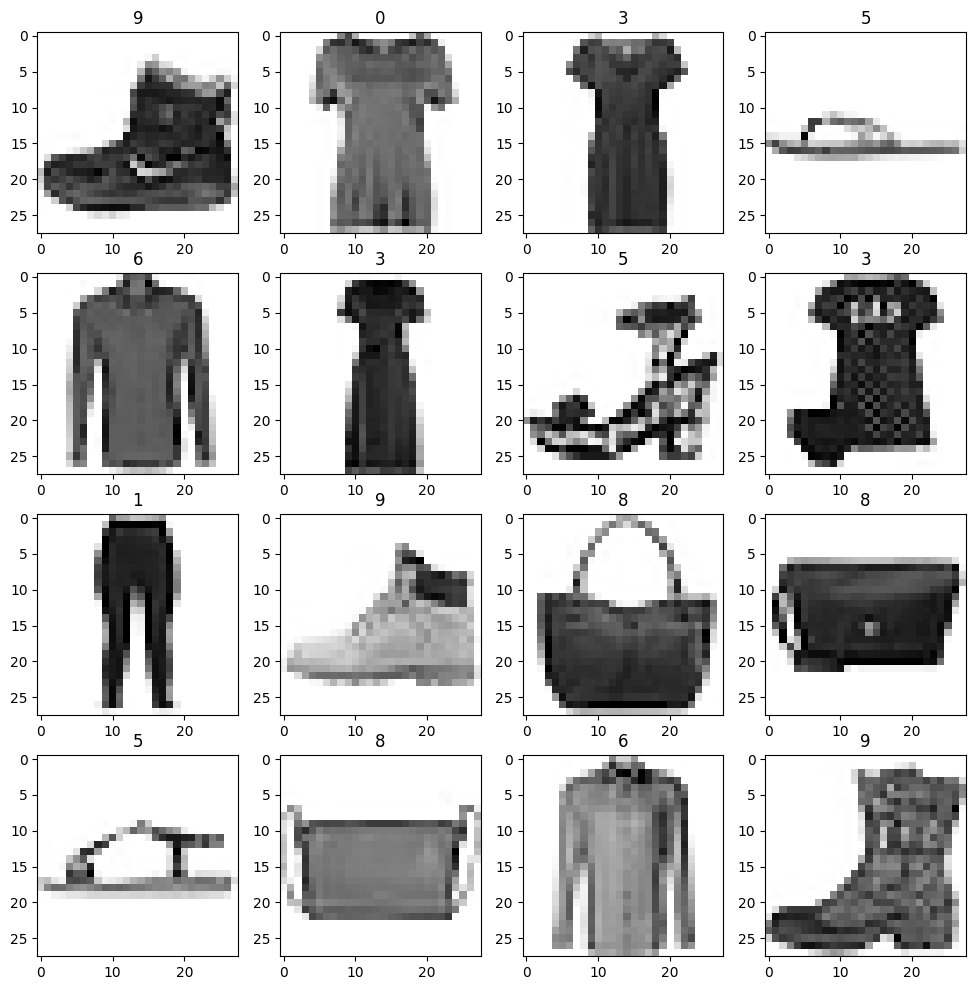

In [2]:
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
steps = 10
acum = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train_images[acum], cmap = 'Greys')
        ax[i][j].set_title(train_labels[acum])
        acum += steps

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 5, input_shape = (28, 28, 1)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
    tf.keras.layers.Conv2D(64, 5),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
    tf.keras.layers.Conv2D(96, 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 re_lu (ReLU)                (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                    

In [4]:
for layer in model.layers:
    print(layer.name)
    print("Input Shape : ", layer.input_shape)
    print("Output Shape : ", layer.output_shape)
    if isinstance(layer, tf.keras.layers.Conv2D):
        print("Weights shape : ", layer.get_weights()[0].shape)
    elif isinstance(layer, tf.keras.layers.Dense):
        print("Weights shape : ", layer.get_weights()[0].shape)

conv2d
Input Shape :  (None, 28, 28, 1)
Output Shape :  (None, 24, 24, 32)
Weights shape :  (5, 5, 1, 32)
re_lu
Input Shape :  (None, 24, 24, 32)
Output Shape :  (None, 24, 24, 32)
max_pooling2d
Input Shape :  (None, 24, 24, 32)
Output Shape :  (None, 12, 12, 32)
conv2d_1
Input Shape :  (None, 12, 12, 32)
Output Shape :  (None, 8, 8, 64)
Weights shape :  (5, 5, 32, 64)
re_lu_1
Input Shape :  (None, 8, 8, 64)
Output Shape :  (None, 8, 8, 64)
max_pooling2d_1
Input Shape :  (None, 8, 8, 64)
Output Shape :  (None, 4, 4, 64)
conv2d_2
Input Shape :  (None, 4, 4, 64)
Output Shape :  (None, 2, 2, 96)
Weights shape :  (3, 3, 64, 96)
re_lu_2
Input Shape :  (None, 2, 2, 96)
Output Shape :  (None, 2, 2, 96)
max_pooling2d_2
Input Shape :  (None, 2, 2, 96)
Output Shape :  (None, 1, 1, 96)
flatten
Input Shape :  (None, 1, 1, 96)
Output Shape :  (None, 96)
dense
Input Shape :  (None, 96)
Output Shape :  (None, 10)
Weights shape :  (96, 10)


In [5]:
train_log = model.fit(train_images, train_labels,
    batch_size = 64,
    epochs = 15,
    validation_data = (test_images, test_labels))

Epoch 1/15
938/938 [==============================] - 21s 22ms/step - loss: 0.7081 - accuracy: 0.8017 - val_loss: 0.4141 - val_accuracy: 0.8499
Epoch 2/15
938/938 [==============================] - 20s 21ms/step - loss: 0.3694 - accuracy: 0.8668 - val_loss: 0.4099 - val_accuracy: 0.8526
Epoch 3/15
938/938 [==============================] - 20s 21ms/step - loss: 0.3286 - accuracy: 0.8816 - val_loss: 0.3898 - val_accuracy: 0.8607
Epoch 4/15
938/938 [==============================] - 18s 19ms/step - loss: 0.3029 - accuracy: 0.8894 - val_loss: 0.3563 - val_accuracy: 0.8776
Epoch 5/15
938/938 [==============================] - 18s 19ms/step - loss: 0.2845 - accuracy: 0.8972 - val_loss: 0.3328 - val_accuracy: 0.8865
Epoch 6/15
938/938 [==============================] - 20s 21ms/step - loss: 0.2719 - accuracy: 0.8999 - val_loss: 0.3480 - val_accuracy: 0.8815
Epoch 7/15
938/938 [==============================] - 20s 22ms/step - loss: 0.2598 - accuracy: 0.9048 - val_loss: 0.3486 - val_accuracy:

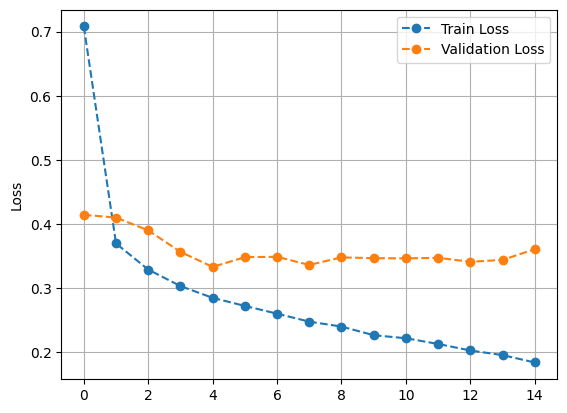

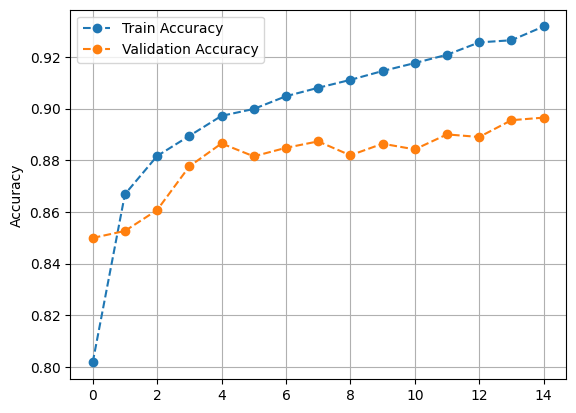

In [6]:
fig = plt.figure()
plt.plot(train_log.history['loss'], label = 'Train Loss', linestyle = '--', marker = 'o')
plt.plot(train_log.history['val_loss'], label = 'Validation Loss', linestyle = '--', marker = 'o')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure()
plt.plot(train_log.history['accuracy'], label = 'Train Accuracy', linestyle = '--', marker = 'o')
plt.plot(train_log.history['val_accuracy'], label = 'Validation Accuracy', linestyle = '--', marker = 'o')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', "{:0.2%}".format(test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8965
Test accuracy :  89.65%


313/313 [==============================] - 2s 5ms/step


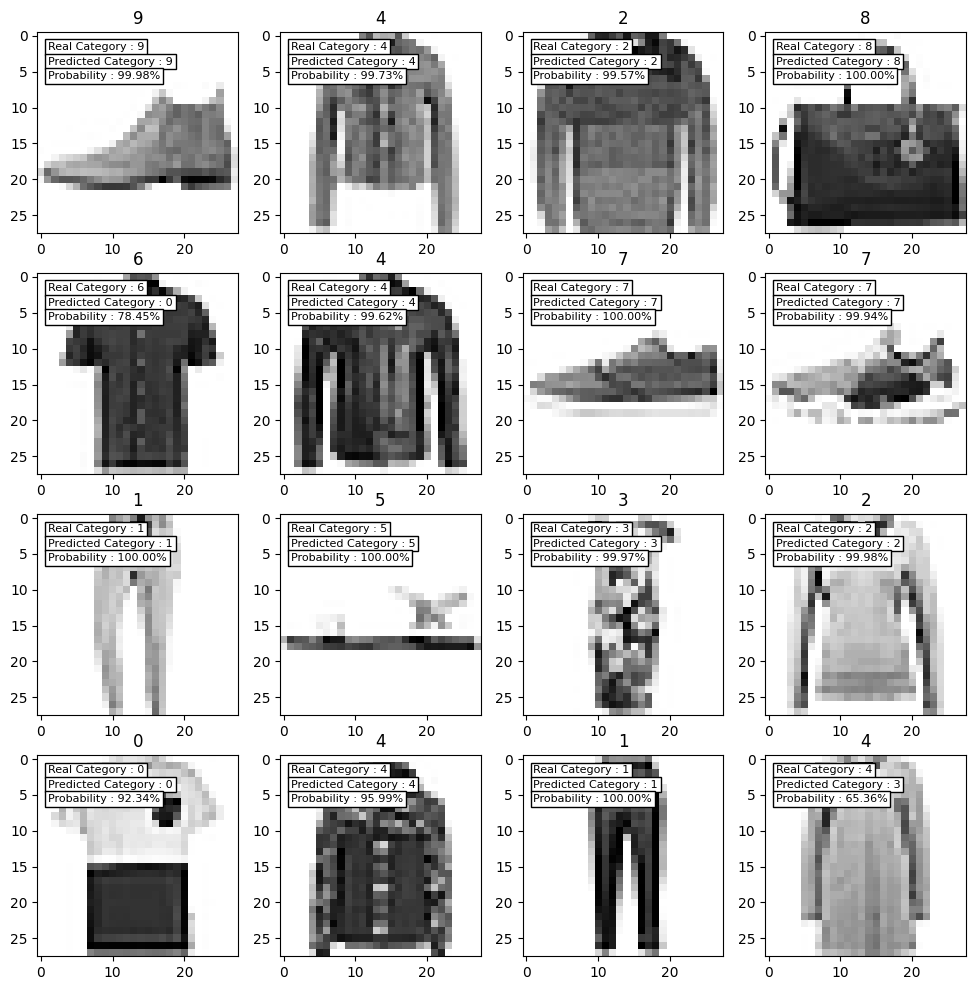

In [8]:
prediction = model.predict(test_images)
fig, ax = plt.subplots(4, 4, figsize = (12, 12))
steps = 10
acum = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(test_images[acum], cmap = 'Greys')
        ax[i][j].set_title(test_labels[acum])
        ax[i][j].text(1, 2, 'Real Category : ' + str(test_labels[acum]), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        ax[i][j].text(1, 4, 'Predicted Category : ' + str(np.argmax(prediction[acum])), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        ax[i][j].text(1, 6, 'Probability : ' + "{0:0.2%}".format(max(prediction[acum])), fontsize = 8, bbox = {'facecolor': 'white', 'pad': 2})
        acum += steps

Layers dimensions
(5, 5, 1, 32)
(32,)
(5, 5, 32, 64)
(64,)
(3, 3, 64, 96)
(96,)
(96, 10)
(10,)
5
Weights of first convolutional layer


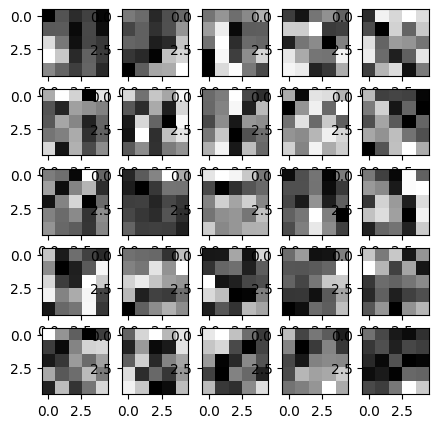

In [9]:
print("Layers dimensions")
n = len(model.trainable_variables)
for i in range(n):
    print(model.trainable_variables[i].numpy().shape)

first_layer_size = model.layers[0].get_weights()[0].shape[3]
div = int(np.floor(np.sqrt(first_layer_size)))
print(div)
print("Weights of first convolutional layer")
fig, ax = plt.subplots(div, div, figsize = (div, div))
for i in range(div):
    for j in range(div):
        ax[i][j].imshow(model.trainable_variables[0].numpy()[:, :, 0, div*i + j], cmap = 'Greys')

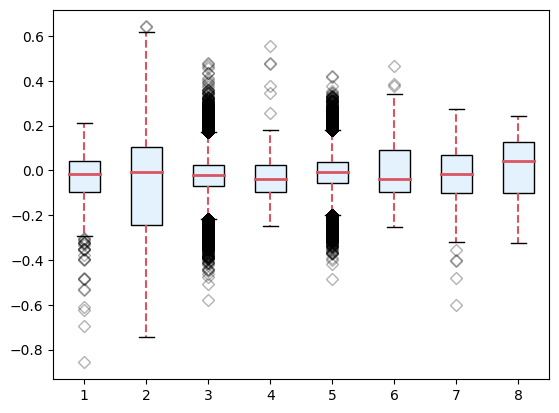

In [10]:
data = [model.trainable_variables[i].numpy().flatten() for i in range(len(model.trainable_variables))]
fig, ax = plt.subplots()
box_plot = ax.boxplot(data, patch_artist = True)

for whisker in box_plot['whiskers']:
    whisker.set(color ='#DB5461', linewidth = 1.5, linestyle ="--")

for flier in box_plot['fliers']:
    flier.set(marker ='D', color ='#686963', alpha = 0.3)

for median in box_plot['medians']:
    median.set(color ='#DB5461', linewidth = 2)

for patch in box_plot['boxes']:
    patch.set_facecolor('#E3F2FD')

In [11]:
def configure_box_plot(box_plot):
    for whisker in box_plot['whiskers']:
        whisker.set(color ='#DB5461', linewidth = 1.5, linestyle ="--")

    for flier in box_plot['fliers']:
        flier.set(marker ='D', color ='#686963', alpha = 0.3)

    for median in box_plot['medians']:
        median.set(color ='#DB5461', linewidth = 2)

    for patch in box_plot['boxes']:
        patch.set_facecolor('#E3F2FD')

0.64271283


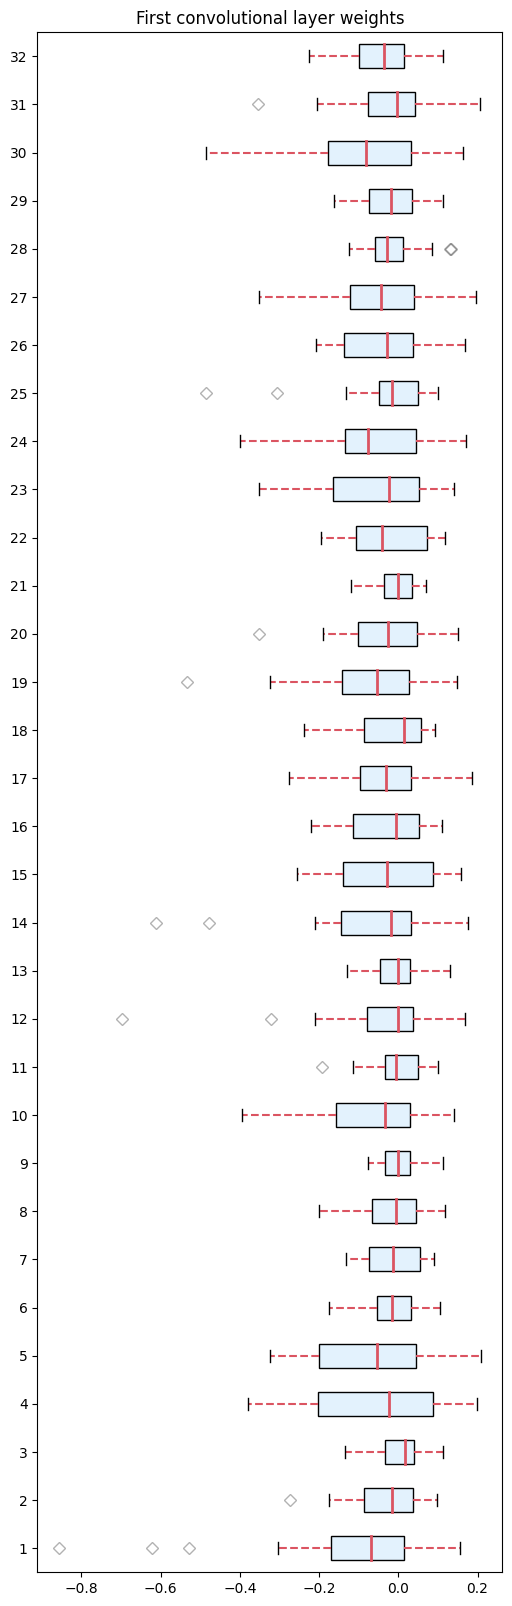

In [12]:
# First convolutional layer weights distribution
trainable_block = 0
data = [model.trainable_variables[trainable_block].numpy()[:, :, 0, i].flatten() for i in range(0, model.trainable_variables[trainable_block].numpy().shape[3], 1)]

fig, ax = plt.subplots(figsize = (6,20))
ax.set_title("First convolutional layer weights")
box_plot = ax.boxplot(data, patch_artist = True, vert = 0)
configure_box_plot(box_plot)

trainable_block = 1
# for i in range(model.trainable_variables[layer].numpy().shape[0]):
#     print(model.trainable_variables[layer].numpy()[i])

print(max(model.trainable_variables[trainable_block].numpy()))

In [13]:
# Test modify some weight manually
model.get_weights()[0].shape
[foo, bias] = model.layers[0].get_weights()
print("Original bias first layer :", bias[0:10])
lost_value = bias[0]
bias[0] = 10
model.layers[0].set_weights([foo, bias])
print("Modified bias to be saved :", bias[0:10])
print("Modified model bias :", model.layers[0].get_weights()[1][:10])

Original bias first layer : [ 0.41723186 -0.00455829 -0.7452092   0.47012725  0.24082284 -0.275704
 -0.34925935 -0.49454945 -0.3743961   0.08168453]
Modified bias to be saved : [ 1.0000000e+01 -4.5582922e-03 -7.4520922e-01  4.7012725e-01
  2.4082284e-01 -2.7570400e-01 -3.4925935e-01 -4.9454945e-01
 -3.7439609e-01  8.1684530e-02]
Modified model bias : [ 1.0000000e+01 -4.5582922e-03 -7.4520922e-01  4.7012725e-01
  2.4082284e-01 -2.7570400e-01 -3.4925935e-01 -4.9454945e-01
 -3.7439609e-01  8.1684530e-02]


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy with modified bias : ', "{:0.2%}".format(test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.3769 - accuracy: 0.8901
Accuracy with modified bias :  89.01%


In [15]:
# Recover value
[foo, bias] = model.layers[0].get_weights()
print("Modified bias :", bias[0:10])
bias[0] = lost_value
model.layers[0].set_weights([foo, bias])
print("Recovered bias: ", model.layers[0].get_weights()[1][:10])

Modified bias : [ 1.0000000e+01 -4.5582922e-03 -7.4520922e-01  4.7012725e-01
  2.4082284e-01 -2.7570400e-01 -3.4925935e-01 -4.9454945e-01
 -3.7439609e-01  8.1684530e-02]
Recovered bias:  [ 0.41723186 -0.00455829 -0.7452092   0.47012725  0.24082284 -0.275704
 -0.34925935 -0.49454945 -0.3743961   0.08168453]


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy with recovered original bias : ', "{:0.2%}".format(test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.3605 - accuracy: 0.8965
Accuracy with recovered original bias :  89.65%


In [2]:
save_dir = "./logs/"
save_path = save_dir + "model_v1"
# model.save(save_path)

In [14]:
model = tf.keras.models.load_model(save_path)
loss, acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', "{:0.2%}".format(acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.3605 - accuracy: 0.8965
Test accuracy :  89.65%


In [5]:
for i in range(len(model.layers)):
    # for j in range(len(model.layers[i].get_weights())):
    print("Layer : ", i, model.layers[i].name,"params ", len(model.layers[i].get_weights()))#, len(q_aware_model.layers[i]), "Weights len")


Layer :  0 conv2d params  2
Layer :  1 re_lu params  0
Layer :  2 max_pooling2d params  0
Layer :  3 conv2d_1 params  2
Layer :  4 re_lu_1 params  0
Layer :  5 max_pooling2d_1 params  0
Layer :  6 conv2d_2 params  2
Layer :  7 re_lu_2 params  0
Layer :  8 max_pooling2d_2 params  0
Layer :  9 flatten params  0
Layer :  10 dense params  2


In [13]:
lay = 10
for j in range(len(model.layers[lay].get_weights())):
    print("Layer : ", i, model.layers[lay].name,"params ", model.layers[lay].get_weights()[j])#, len(q_aware_model.layers[i]), "Weights len")


Layer :  10 dense params  [[-5.47411479e-02 -1.27173603e-01  5.55272661e-02 -7.32835010e-02
  -6.68929070e-02  8.55813399e-02 -5.01673948e-03 -8.37537944e-02
   9.59372893e-02  1.45504922e-01]
 [-1.36915252e-01  2.30431315e-02  1.48040920e-01 -6.79651126e-02
   5.45923784e-02 -2.91142672e-01 -8.59048888e-02 -3.20312887e-01
  -3.14730108e-01 -1.69607967e-01]
 [-1.94399729e-01  1.47860453e-01  5.96502610e-02 -5.16279936e-02
   3.37839797e-02  7.39600211e-02  1.47639915e-01 -9.04550105e-02
  -1.53204039e-01 -8.89341235e-02]
 [ 3.07073630e-02 -1.55945987e-01 -1.41926128e-02 -1.16790839e-01
  -1.26796350e-01  1.05066538e-01  1.13460263e-02  1.25374332e-01
  -1.69589534e-01 -6.92138076e-02]
 [ 1.23189732e-01 -1.37089044e-01  5.86811081e-02 -2.56901886e-02
   5.33240698e-02  9.97262895e-02  1.25482842e-01  4.65315022e-02
  -1.92029387e-01 -4.02895361e-02]
 [-1.51289836e-01  6.51784390e-02  1.98611975e-01 -9.89418477e-02
   3.98102477e-02 -6.17933981e-02 -7.53132999e-02  5.51388366e-04
   1.55